In [1]:
#!pip install ultralytics -q

In [1]:
from ultralytics import YOLO


%matplotlib inline
%config Completer.use_jedi = False

from matplotlib import pyplot as plt
from PIL import Image
import cv2 
from IPython.display import display


#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device

In [47]:
def show_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    display(Image.fromarray(img))
    
def rescale_frame(frame, scale = 0.75,width = 0, height = 0):
    '''Resize input image'''
    
    if scale != 0:
        width = int(frame.shape[1] * scale)
        height = int(frame.shape[0] * scale)
        dim = (width, height)
    else:
        dim = (width, height)
    
      
    out = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    return out


def get_shape_frame(frame):
    height, width, channels = frame.shape
    print(f"height: {height}, width: {width}, channels: {channels}")
    return height, width, channels

In [3]:
#image = cv2.imread('Dataset/SSD/cat/cat.10084.jpg')
#show_image(image)

In [22]:
model = YOLO("Models/yolo/yolov8m-seg.pt")

In [24]:
image = cv2.imread("Dataset/SSD/cat/cat.10528.jpg")
results = model(image , device = 0,
                            save_txt=True,    
                            save_conf=False,  
                            save_crop=False,   
                            save = True,
                            #boxes=True,     
                            retina_masks = False,
                            #stream=True,
                            verbose=True
                       )


0: 640x416 1 cat, 1 bowl, 1 sink, 239.4ms
Speed: 3.0ms preprocess, 239.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict2
1 label saved to runs\segment\predict2\labels


WARNING  'Masks.masks' is deprecated. Use 'Masks.data' instead.


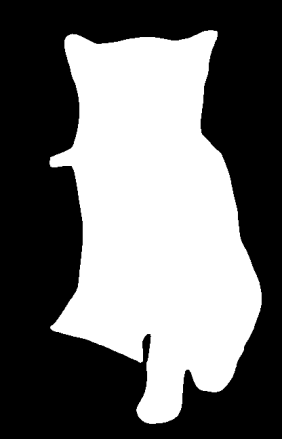

In [57]:
mask = (results[0].masks.masks[0].cpu().numpy() * 255).astype("uint8")

mask = rescale_frame(mask, scale = 0, width= 282, height=439)
show_image(mask)


In [15]:
import time

prev_frame_time = 0
new_frame_time = 0


cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        new_frame_time = time.time()
        # Run YOLOv8 inference on the frame
        results = model(frame , device = 0,
                            save_txt=False,    
                            save_conf=False,  
                            save_crop=False,   
                            save = False,
                            #boxes=True,     
                            retina_masks = False,
                            #stream=True,
                            verbose=False
                       )

        # Visualize the results on the frame
        annotated_frame = results[0].plot(masks = False)
        
        fps = 1//(new_frame_time-prev_frame_time)
        prev_frame_time = new_frame_time
     
        cv2.putText(annotated_frame, str(fps), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 255, 0), 3, cv2.LINE_AA)  
        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [10]:
cap.release()
cv2.destroyAllWindows()